In [82]:
# needs data generated by created_dataset_2
# predicts genre by image

In [83]:
import re
import os
import keras
import numpy as np
import pandas as pd

from PIL import Image

from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import combinations

%matplotlib inline

In [84]:
np.random.seed(seed=100500)

In [149]:
TEST_SIZE = .1

In [150]:
X = np.load('X.npy')
y = np.load('y.npy')
labels = np.load('styles.npy')

In [151]:
# split data onto training/test sets
ntest = int(len(y) * TEST_SIZE)
y_train, y_test = (y[:-ntest], y[-ntest:])
X_train, X_test = (X[:-ntest], X[-ntest:])

In [152]:
X_train.shape[1]
y_train.shape[1]

135

In [181]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv1D
from keras.regularizers import l2, activity_l2

model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu', W_regularizer=l2(0.001), b_regularizer=l2(0.001)),
#     Dropout(0.5),
    Dense(64),
#     Dropout(0.5),
    Dense(64),
    Dropout(0.5),
    Dense(y_train.shape[1]),
    Activation('softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='SGD')

In [183]:
scores = []

# evaluate how many exact matches there are
def score_top1():
    s = 0
    n = 7866

    y_p = model.predict(X_test[s:s+n])
    yc = np.argmax(y_test[s:s+n], axis=1)
    ycp = np.argmax(y_p, axis=1)
    
    #     plt.figure(figsize=(20, 4))
    #     plt.plot(yc)
    #     plt.plot(ycp)

    m = 0.

    for i in range(len(yc)):
        if 0 == yc[i] - ycp[i]: m = m + 1.

    return m * 100. / len(yc) # % of top-1 hits

class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        s = score_top1()
        scores.append(s)
        print "\n\n%3f %% top-1\n"%s

In [184]:
scores = []

hist = model.fit(
        X_train,
        y_train,
        batch_size=100,
        nb_epoch=30, 
        validation_data=(X_test, y_test),
        callbacks = [
            # keras.callbacks.TensorBoard(log_dir='/tmp/tb4', write_images=True),
            MyCallback()
        ]
     )

Train on 70802 samples, validate on 7866 samples
Epoch 1/30
70600/70802 [============================>.] - ETA: 0s - loss: 2.6499

21.141622 % top-1

70802/70802 [==============================] - 3s - loss: 2.6497 - val_loss: 3.2513
Epoch 2/30
70600/70802 [============================>.] - ETA: 0s - loss: 2.6156

21.434020 % top-1

70802/70802 [==============================] - 3s - loss: 2.6161 - val_loss: 2.9559
Epoch 3/30
70600/70802 [============================>.] - ETA: 0s - loss: 2.5841

32.939232 % top-1

70802/70802 [==============================] - 3s - loss: 2.5837 - val_loss: 2.4211
Epoch 4/30
70700/70802 [============================>.] - ETA: 0s - loss: 2.5530

28.629545 % top-1

70802/70802 [==============================] - 3s - loss: 2.5534 - val_loss: 2.6607
Epoch 5/30
70800/70802 [============================>.] - ETA: 0s - loss: 2.5265

23.468091 % top-1

70802/70802 [==============================] - 3s - loss: 2.5265 - val_loss: 3.0251
Epoch 6/30
70700/70802 [==

KeyboardInterrupt: 

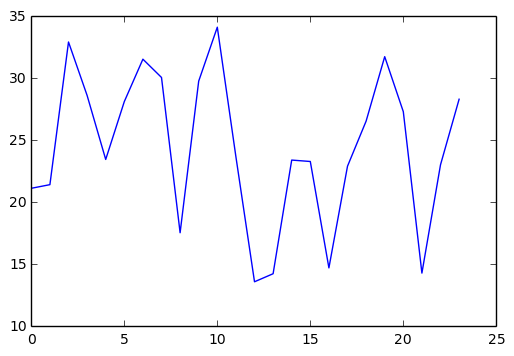

In [185]:
# plt.plot(hist.history['val_loss'])
plt.plot(scores)

In [50]:
from keras.utils import visualize_util
visualize_util.plot(model, to_file='model.png', show_shapes=True)

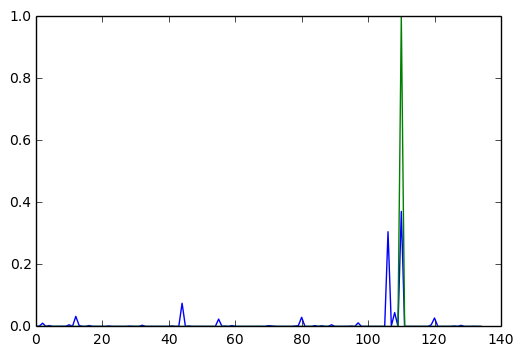

In [162]:
plt.plot(y_p[99])
plt.plot(y_test[99])

In [135]:
model.save('style-by-image.h5')